In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/4.Multi linear Regression/Computer_Data.csv") 
df.head(2)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1


In [4]:
df1 = df.drop(df.columns[[0,6,7,8]], axis=1)
df1.head(2)

,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1


In [5]:
df1.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [6]:
#First Model


import statsmodels.formula.api as smf

model1 = smf.ols('price~speed+hd+ram+screen+ads+trend', data = df1).fit()
print(model1.summary())

model1_pred = model1.predict(df1)
model1_error = model1_pred - df1.price
model1_RMSE = np.sqrt(np.mean(model1_error*model1_error))
model1_Rsquare = model1.rsquared
print('First Model:  ','RMSE:',model1_RMSE,'RSquare:',model1_Rsquare)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:05:48   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.0

In [7]:
# influence plot to check the rows causing error

# import statsmodels.api as sm
# plt.figure(figsize=(45,15))
# sm.graphics.influence_plot(model1)
# plt.show()

In [8]:
# based on influence plot we will drop row = 1440,1700,3783,4477,5960
# print(df1.iloc[[1440,1700,3783,4477,5960]]) # Clearly CC value= 16,000  is completely differnt rest of the rows

df2=df1.drop(df1.index[[1440,1700,3783,4477,5960,1101,900]])

In [9]:
#Second Model

import statsmodels.formula.api as smf

model2 = smf.ols('price~speed+hd+ram+screen+ads+trend', data = df2).fit()
print(model2.summary())

model2_pred = model2.predict(df2)
model2_error = model2_pred - df2.price
model2_RMSE = np.sqrt(np.mean(model2_error*model2_error))
model2_Rsquare = model2.rsquared
print('Second Model:  ','RMSE:',model2_RMSE,'RSquare:',model2_Rsquare)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2583.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:07:21   Log-Likelihood:                -44726.
No. Observations:                6252   AIC:                         8.947e+04
Df Residuals:                    6245   BIC:                         8.951e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -220.6282     66.030     -3.341      0.0

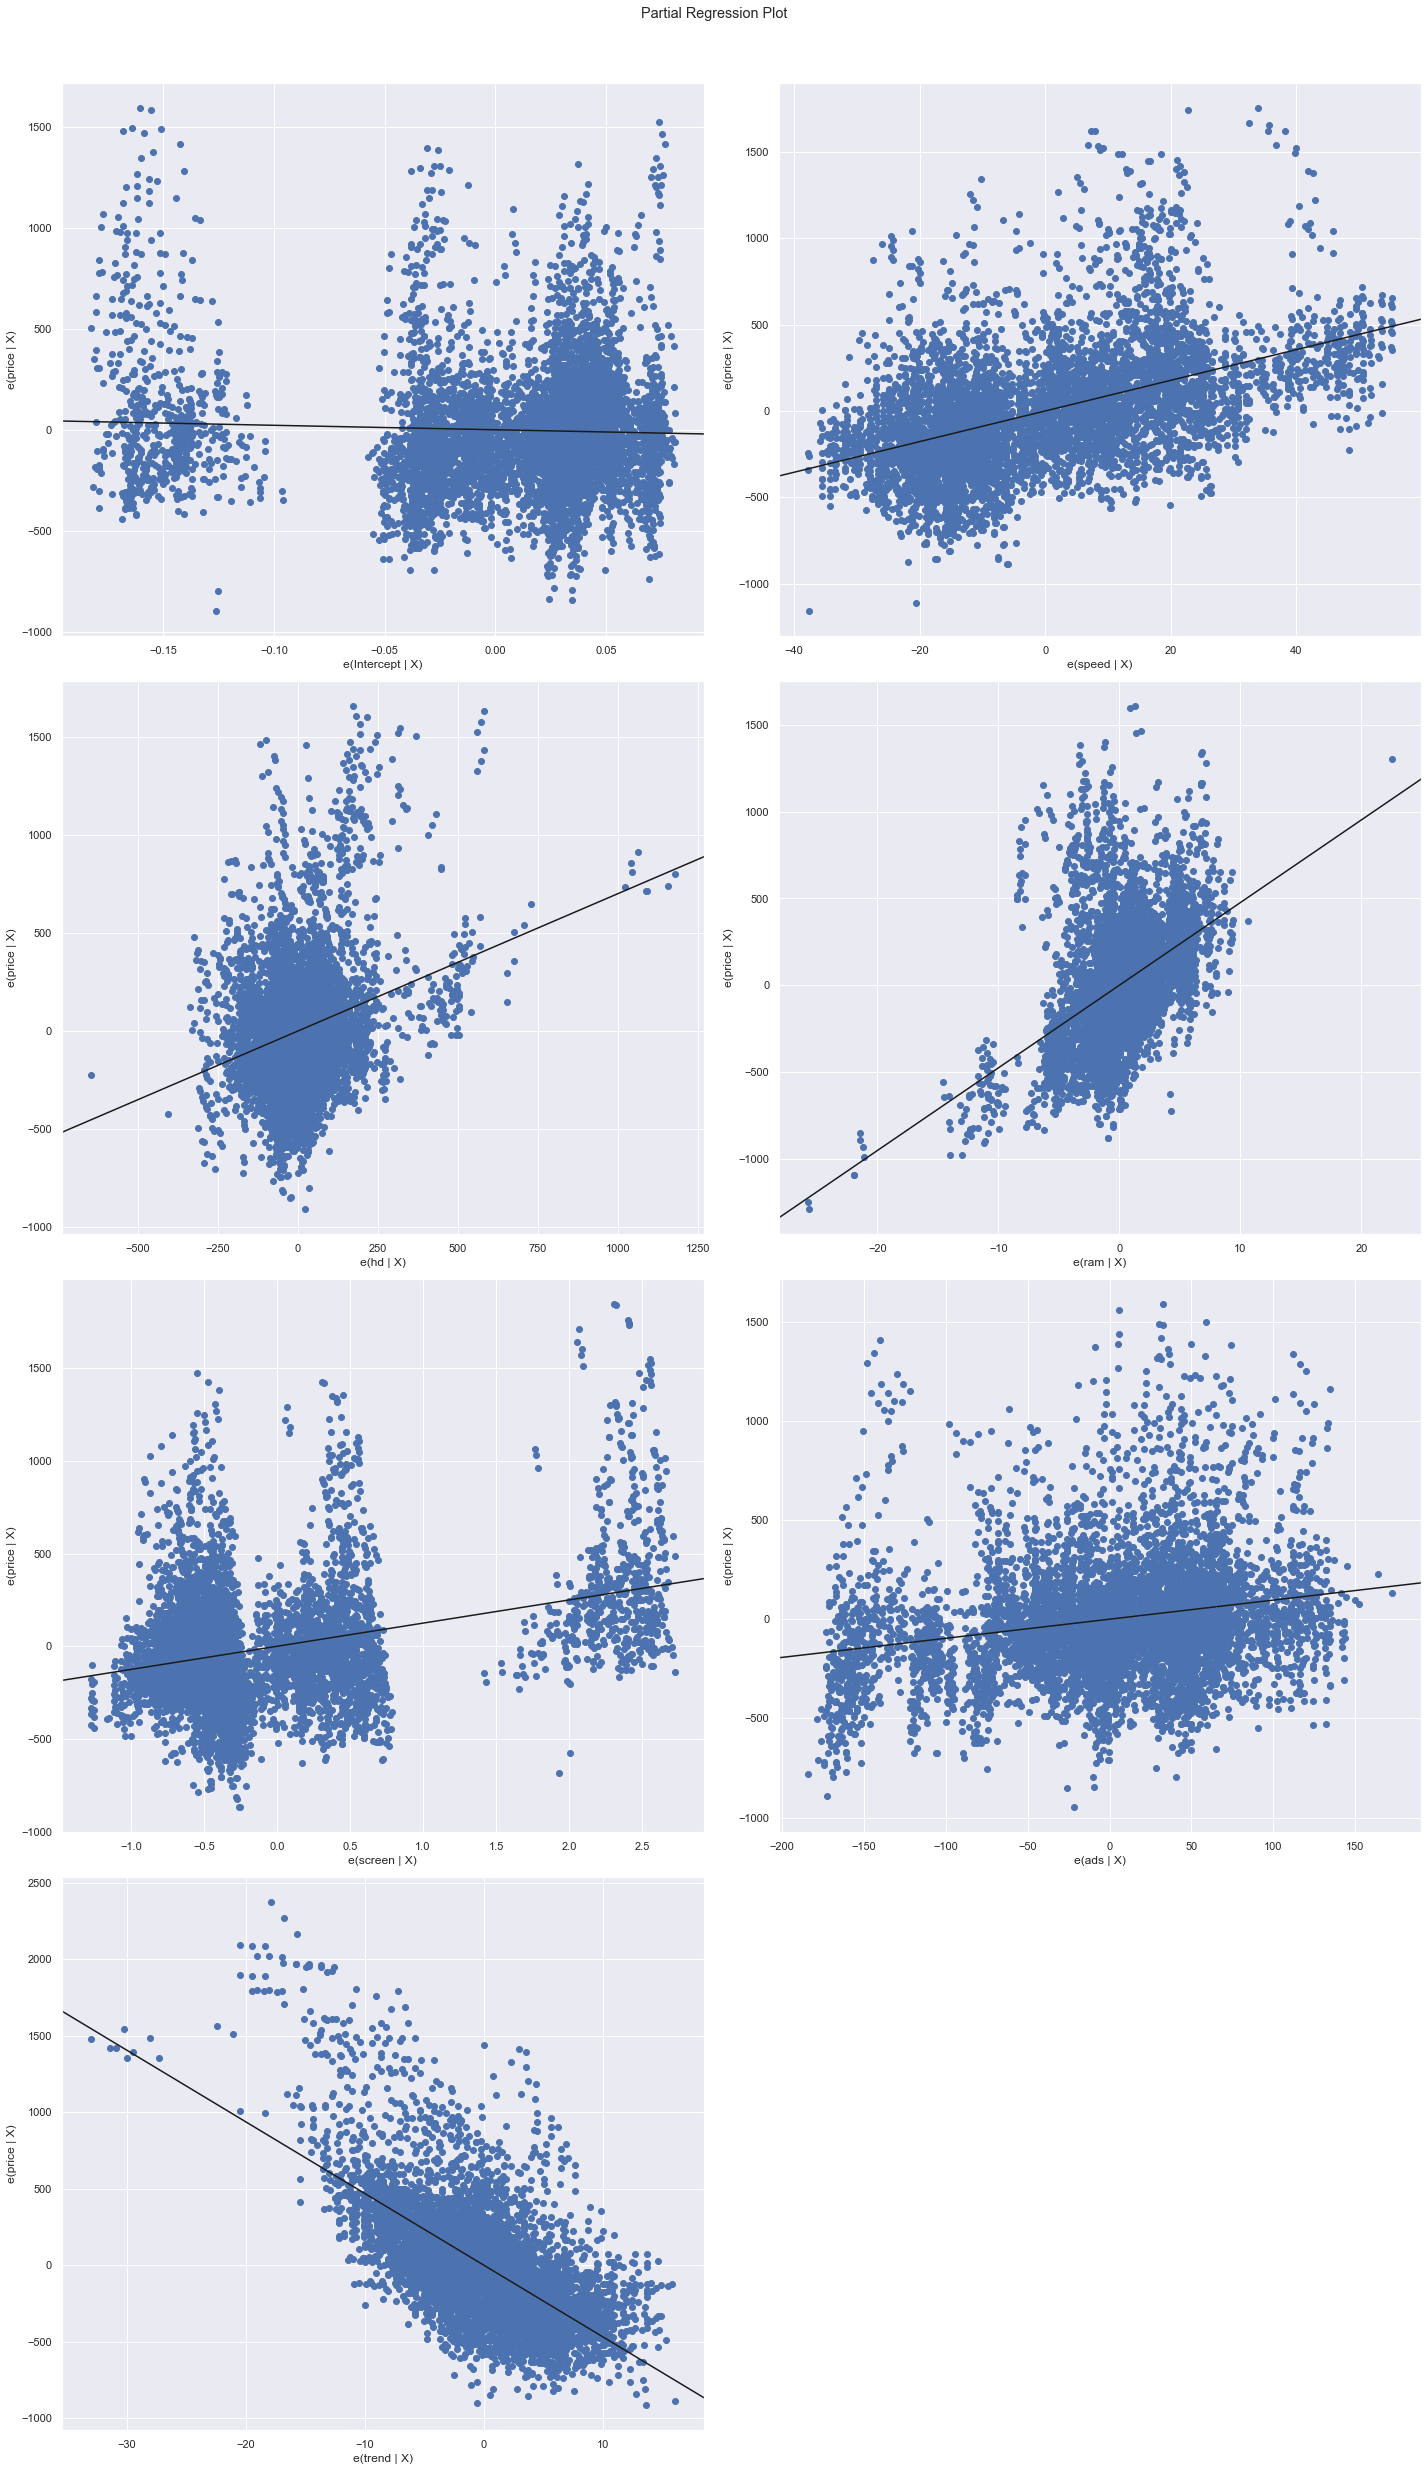

In [62]:
# Plot partial regression plot for identifying impact of each features 
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model2)
sns.set(rc={'figure.figsize':(20,35)})
plt.show()

In [29]:
# based on partial regression plot and P value obtained from Model2, we can drop column 'intercept' from our model

In [11]:
#Model 3 - Dropping intercept

import statsmodels.formula.api as smf

model3 = smf.ols('price~speed+hd+ram+screen+ads+trend-1', data = df2).fit()
print(model3.summary())

model3_pred = model3.predict(df2)
model3_error = model3_pred - df2.price
model3_RMSE = np.sqrt(np.mean(model3_error*model3_error))
model3_Rsquare = model3.rsquared
print('Final Model:  ','RMSE:',model3_RMSE,'RSquare:',model3_Rsquare)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          5.592e+04
Date:                Sun, 03 May 2020   Prob (F-statistic):                        0.00
Time:                        20:08:34   Log-Likelihood:                         -44732.
No. Observations:                6252   AIC:                                  8.948e+04
Df Residuals:                    6246   BIC:                                  8.952e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(df2[['speed','hd','ram','screen','ads','trend']],df2.price)

print("Coefficent M: ",reg.coef_)
print("intercept 'B': ",reg.intercept_)

flag=True
while(flag):
    a = int(input("Speed: "))
    b = int(input("HD: "))
    c = int(input("RAM: "))
    d = int(input("Screen: "))
    e = int(input("ADS: "))
    f = int(input("Trend: "))
    
    myoutput = reg.predict([[a,b,c,d,e,f]])
    print("Price: ",myoutput)
    flag = int(input("press 1 to continue or Press 0 to exit : "))

Coefficent M:  [  8.86774378   0.70128712  47.66993153 124.87184516   0.96250261
 -46.84480859]
intercept 'B':  -220.62824542716544
Speed: 1500
HD: 50
RAM: 8
Screen: 16
ADS: 100
Trend: 1
Price:  [15544.76621528]
press 1 to continue or Press 0 to exit : 0
